In [45]:
import gspread
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [187]:
client = gspread.service_account("Documents/Data_Epic_Mentorship/gspread_project/Humphery_Ufuoma/project-1/spartan-figure-402211-2241d0349aab.json")

spreadsheet = client.open_by_url("https://docs.google.com/spreadsheets/d/1SUlcukpgxf6pfFQbj6DKQZXSlOhyBOSuBdbmQ2ZbhTM/edit?usp=sharing")
worksheet = spreadsheet.worksheet("missing_data")

spreadsheet_data = worksheet.get_all_records()
spreadsheet_data

[{'Permit Number': 201505000000.0,
  'Permit Type': 4,
  'Permit Type Definition': 'sign - erect',
  'Permit Creation Date': '05/06/2015',
  'Block': 326,
  'Lot': 23,
  'Street Number': 140,
  'Street Number Suffix': '',
  'Street Name': 'Ellis',
  'Street Suffix': 'St',
  'Unit': '',
  'Unit Suffix': '',
  'Description': 'ground fl facade: to erect illuminated, electric, wall, single faced sign. n/a for maher ordinance 155-13.',
  'Current Status': 'expired',
  'Current Status Date': '12/21/2017',
  'Filed Date': '05/06/2015',
  'Issued Date': '11/09/2015',
  'Completed Date': '',
  'First Construction Document Date': '11/09/2015',
  'Structural Notification': '',
  'Number of Existing Stories': 6,
  'Number of Proposed Stories': '',
  'Voluntary Soft-Story Retrofit': '',
  'Fire Only Permit': '',
  'Permit Expiration Date': '11/03/2016',
  'Estimated Cost': 4000,
  'Revised Cost': 4000,
  'Existing Use': 'tourist hotel/motel',
  'Existing Units': 143,
  'Proposed Use': '',
  'Propos

In [193]:
data = pd.DataFrame(spreadsheet_data)
data

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505000000.0,4,sign - erect,05/06/2015,326,23,140,,Ellis,St,...,3,constr type 3,,,,3,Tenderloin,94102,"(37.785719256680785, -122.40852313194863)",1.380610e+12
1,201604000000.0,4,sign - erect,04/19/2016,306,7,440,,Geary,St,...,3,constr type 3,,,,3,Tenderloin,94102,"(37.78733980600732, -122.41063199757738)",1.420160e+12
2,201605000000.0,3,additions alterations or repairs,05/27/2016,595,203,1647,,Pacific,Av,...,1,constr type 1,1,constr type 1,,3,Russian Hill,94109,"(37.7946573324287, -122.42232562979227)",1.424860e+12
3,201611000000.0,8,otc alterations permit,11/07/2016,156,11,1230,,Pacific,Av,...,5,wood frame (5),5,wood frame (5),,3,Nob Hill,94109,"(37.79595867909168, -122.41557405519474)",1.443570e+12
4,201611000000.0,6,demolitions,11/28/2016,342,1,950,,Market,St,...,3,constr type 3,,,,6,Tenderloin,94102,"(37.78315261897309, -122.40950883997789)",1.445480e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15359,201306000000.0,8,otc alterations permit,06/11/2013,7104,018B,162,,Farallones,St,...,5,wood frame (5),5,wood frame (5),,11,Oceanview/Merced/Ingleside,94112,"(37.7143177382725, -122.45793648914099)",1.307690e+12
15360,201306000000.0,8,otc alterations permit,06/11/2013,3609,81,3549,,20th,St,...,5,wood frame (5),5,wood frame (5),,9,Mission,94110,"(37.7583635958755, -122.42012861020109)",1.307690e+12
15361,201306000000.0,8,otc alterations permit,06/11/2013,3609,81,3551,,20th,St,...,5,wood frame (5),5,wood frame (5),,9,Mission,94110,"(37.7583635958755, -122.42012861020109)",1.307690e+12
15362,201306000000.0,8,otc alterations permit,06/11/2013,4260,13,2334,,25th,St,...,5,wood frame (5),5,wood frame (5),,10,Potrero Hill,94107,"(37.752135529825054, -122.40206132582264)",1.307690e+12


The data looks like one related to housing and details of houses in a region

In [95]:
data.shape

(15364, 43)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15364 entries, 0 to 15363
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Permit Number                           15364 non-null  object 
 1   Permit Type                             15364 non-null  int64  
 2   Permit Type Definition                  15364 non-null  object 
 3   Permit Creation Date                    15364 non-null  object 
 4   Block                                   15364 non-null  object 
 5   Lot                                     15364 non-null  object 
 6   Street Number                           15364 non-null  int64  
 7   Street Number Suffix                    15364 non-null  object 
 8   Street Name                             15364 non-null  object 
 9   Street Suffix                           15364 non-null  object 
 10  Unit                                    15364 non-null  ob

In [12]:
data.isna().sum()

Permit Number                             0
Permit Type                               0
Permit Type Definition                    0
Permit Creation Date                      0
Block                                     0
Lot                                       0
Street Number                             0
Street Number Suffix                      0
Street Name                               0
Street Suffix                             0
Unit                                      0
Unit Suffix                               0
Description                               0
Current Status                            0
Current Status Date                       0
Filed Date                                0
Issued Date                               0
Completed Date                            0
First Construction Document Date          0
Structural Notification                   0
Number of Existing Stories                0
Number of Proposed Stories                0
Voluntary Soft-Story Retrofit   

In [194]:
df = data.replace('',np.nan)
df.isna().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Number Suffix                      15204
Street Name                                   0
Street Suffix                               194
Unit                                      13217
Unit Suffix                               15185
Description                                  25
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                                 635
Completed Date                             6235
First Construction Document Date            639
Structural Notification                   14896
Number of Existing Stories              

<AxesSubplot:>

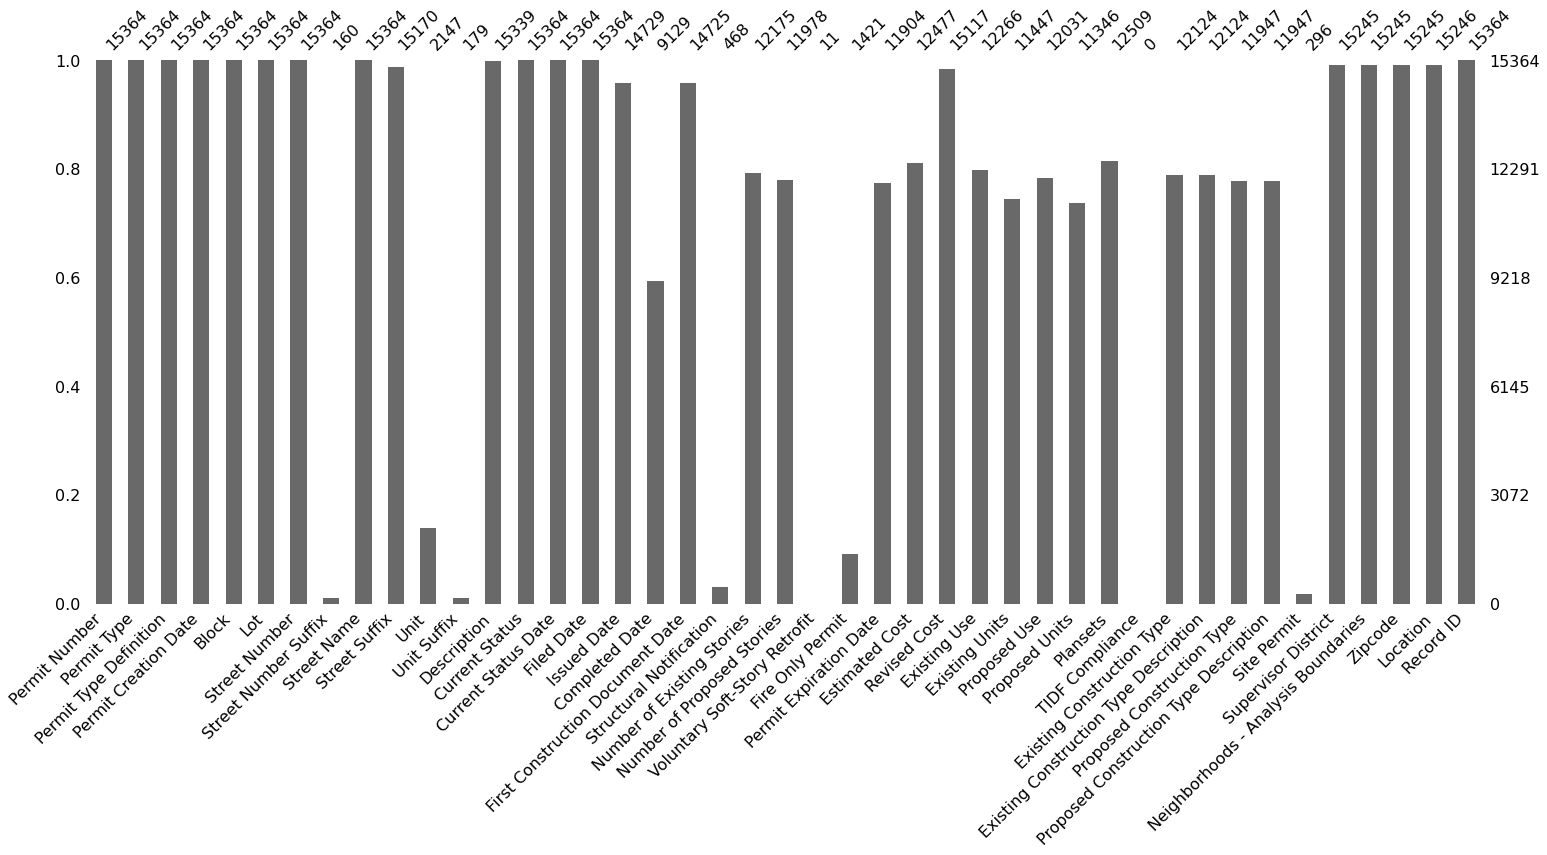

In [101]:
import missingno as msno

msno.bar(df.replace('',np.nan))

In [102]:
data.columns[df.isna().any()]

Index(['Street Number Suffix', 'Street Suffix', 'Unit', 'Unit Suffix',
       'Description', 'Issued Date', 'Completed Date',
       'First Construction Document Date', 'Structural Notification',
       'Number of Existing Stories', 'Number of Proposed Stories',
       'Voluntary Soft-Story Retrofit', 'Fire Only Permit',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units',
       'Plansets', 'TIDF Compliance', 'Existing Construction Type',
       'Existing Construction Type Description', 'Proposed Construction Type',
       'Proposed Construction Type Description', 'Site Permit',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Location'],
      dtype='object')

These are the columns that contains missing data, we will go over them one by one

In [195]:
data.drop(columns=['Voluntary Soft-Story Retrofit','TIDF Compliance'],inplace=True)

Columns are dropped as they have little or zero values

In [103]:
data[df['Street Number Suffix'].isna()]

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505000000.0,4,sign - erect,05/06/2015,326,23,140,,Ellis,St,...,3,constr type 3,,,,3,Tenderloin,94102,"(37.785719256680785, -122.40852313194863)",1.380610e+12
1,201604000000.0,4,sign - erect,04/19/2016,306,7,440,,Geary,St,...,3,constr type 3,,,,3,Tenderloin,94102,"(37.78733980600732, -122.41063199757738)",1.420160e+12
2,201605000000.0,3,additions alterations or repairs,05/27/2016,595,203,1647,,Pacific,Av,...,1,constr type 1,1,constr type 1,,3,Russian Hill,94109,"(37.7946573324287, -122.42232562979227)",1.424860e+12
3,201611000000.0,8,otc alterations permit,11/07/2016,156,11,1230,,Pacific,Av,...,5,wood frame (5),5,wood frame (5),,3,Nob Hill,94109,"(37.79595867909168, -122.41557405519474)",1.443570e+12
4,201611000000.0,6,demolitions,11/28/2016,342,1,950,,Market,St,...,3,constr type 3,,,,6,Tenderloin,94102,"(37.78315261897309, -122.40950883997789)",1.445480e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15359,201306000000.0,8,otc alterations permit,06/11/2013,7104,018B,162,,Farallones,St,...,5,wood frame (5),5,wood frame (5),,11,Oceanview/Merced/Ingleside,94112,"(37.7143177382725, -122.45793648914099)",1.307690e+12
15360,201306000000.0,8,otc alterations permit,06/11/2013,3609,81,3549,,20th,St,...,5,wood frame (5),5,wood frame (5),,9,Mission,94110,"(37.7583635958755, -122.42012861020109)",1.307690e+12
15361,201306000000.0,8,otc alterations permit,06/11/2013,3609,81,3551,,20th,St,...,5,wood frame (5),5,wood frame (5),,9,Mission,94110,"(37.7583635958755, -122.42012861020109)",1.307690e+12
15362,201306000000.0,8,otc alterations permit,06/11/2013,4260,13,2334,,25th,St,...,5,wood frame (5),5,wood frame (5),,10,Potrero Hill,94107,"(37.752135529825054, -122.40206132582264)",1.307690e+12


Looking at missing data Street Number Suffix

<AxesSubplot:xlabel='Street Number Suffix', ylabel='count'>

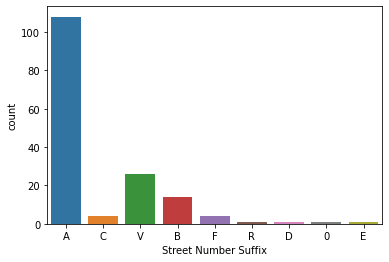

In [43]:
sns.countplot(x='Street Number Suffix',data=data)

In [76]:
data.groupby('Street Number Suffix').get_group('A')

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
92,201408000000.0,8,otc alterations permit,08/25/2014,3509,29,63,A,Grace,St,...,5.0,wood frame (5),5.0,wood frame (5),,6.0,South of Market,94103.0,"(37.774944547030586, -122.41443674356925)",1.353300e+12
164,201707000000.0,2,new construction wood frame,07/14/2017,1193,48,2150,A,Hayes,St,...,,,5.0,wood frame (5),Y,5.0,Lone Mountain/USF,94117.0,"(37.77347316353236, -122.45200535060522)",1.470590e+11
273,M829468,8,otc alterations permit,09/08/2017,3702,390,33,A,08th,St,...,,,,,,6.0,South of Market,94103.0,"(37.77850219390184, -122.413426065671)",1.478110e+12
639,201301000000.0,8,otc alterations permit,01/03/2013,535,29,2327,A,Filbert,St,...,5.0,wood frame (5),5.0,wood frame (5),,2.0,Marina,94123.0,"(37.797469404717916, -122.43776016525479)",1.292270e+12
907,201301000000.0,8,otc alterations permit,01/07/2013,3556,30,261,A,Dolores,St,...,5.0,wood frame (5),5.0,wood frame (5),,8.0,Mission,94103.0,"(37.765326601968276, -122.42589274563393)",1.292540e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14799,201306000000.0,8,otc alterations permit,06/06/2013,6543,36,4511,A,25th,St,...,5.0,wood frame (5),5.0,wood frame (5),,8.0,Noe Valley,94114.0,"(37.749134102127606, -122.43947980811033)",1.307100e+12
14864,M399907,8,otc alterations permit,06/06/2013,2698,14,4416,A,20th,St,...,,,,,,8.0,Castro/Upper Market,94114.0,"(37.75777603992102, -122.4372350548249)",1.307170e+12
15183,M400647,8,otc alterations permit,06/10/2013,3568,29,130,A,Albion,St,...,,,,,,8.0,Mission,94110.0,"(37.764306011842955, -122.42311573536443)",1.307500e+12
15185,201306000000.0,8,otc alterations permit,06/10/2013,5643,23,15,A,Heyman,Av,...,5.0,wood frame (5),5.0,wood frame (5),,9.0,Bernal Heights,94110.0,"(37.742116643486085, -122.42007192054747)",1.307500e+12


-> I can infere the missing data in this column are due to the fact that those street don't have suffixes, hence it is MNAR   
-> we will solve by making a new category 'None' to account for the null values

<AxesSubplot:xlabel='Street Number Suffix', ylabel='count'>

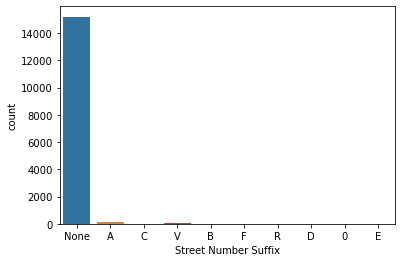

In [196]:
data['Street Number Suffix'].replace('','None',inplace=True)
sns.countplot(x='Street Number Suffix',data=data)

In [105]:
data.loc[data.Unit != '','Block':]

,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
1,306,7,440,,Geary,St,0,,remove (e) awning and associated signs.,issued,...,3,constr type 3,,,,3,Tenderloin,94102,"(37.78733980600732, -122.41063199757738)",1.420160e+12
3,156,11,1230,,Pacific,Av,0,,repair dryrot & stucco at front of bldg.,complete,...,5,wood frame (5),5,wood frame (5),,3,Nob Hill,94109,"(37.79595867909168, -122.41557405519474)",1.443570e+12
6,1739,20,1291,,11th,Av,0,,re-roofing,complete,...,5,wood frame (5),5,wood frame (5),,5,Inner Sunset,94122,"(37.764145640138565, -122.46875112470363)",1.468970e+12
15,243,43,840,,Powell,St,301,,street space,issued,...,,,,,,3,Chinatown,94108,"(37.7926690651263, -122.40883941791454)",1.472090e+11
17,3621,97,3707,,21st,St,0,,street space & sidewalk repair,issued,...,,,,,,8,Noe Valley,94114,"(37.75607840165479, -122.43041143390109)",1.472180e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15318,3641,48,932,,Shotwell,St,0,,convert exiting 2nd floor closet to 1/2 half b...,complete,...,5,wood frame (5),5,wood frame (5),,9,Mission,94110,"(37.752950200229705, -122.4155330331971)",1.307640e+12
15324,3501,1,2,,Guerrero,St,0,,to renew final inspection for work approved un...,complete,...,1,constr type 1,1,constr type 1,,8,Mission,94103,"(37.77034825813612, -122.42496360709316)",1.307650e+12
15326,196,25,30,,Hotaling,Pl,0,,installation of light fixturs in open office a...,complete,...,1,constr type 1,1,constr type 1,,3,Chinatown,94111,"(37.796012143728916, -122.40255786415696)",1.307650e+12
15330,1062,43,130,,Palm,Av,0,,add 22 fire sprinklers at new apt. ref pa# 20...,complete,...,5,wood frame (5),5,wood frame (5),,2,Presidio Heights,94118,"(37.783022398655305, -122.45751032321567)",1.307650e+12


Checking Unit and Unit Suffix Features

In [197]:
data['Unit'].replace('',0.0,inplace=True)

data['Unit'] = data['Unit'].astype(float)

Assumption made is missing values for Unit features are 0.0 which is the mode of the Feature. Missing data is MNAR cause there it isn't at random the missing values are cause of the absence of Unit values

In [107]:
data

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505000000.0,4,sign - erect,05/06/2015,326,23,140,,Ellis,St,...,3,constr type 3,,,,3,Tenderloin,94102,"(37.785719256680785, -122.40852313194863)",1.380610e+12
1,201604000000.0,4,sign - erect,04/19/2016,306,7,440,,Geary,St,...,3,constr type 3,,,,3,Tenderloin,94102,"(37.78733980600732, -122.41063199757738)",1.420160e+12
2,201605000000.0,3,additions alterations or repairs,05/27/2016,595,203,1647,,Pacific,Av,...,1,constr type 1,1,constr type 1,,3,Russian Hill,94109,"(37.7946573324287, -122.42232562979227)",1.424860e+12
3,201611000000.0,8,otc alterations permit,11/07/2016,156,11,1230,,Pacific,Av,...,5,wood frame (5),5,wood frame (5),,3,Nob Hill,94109,"(37.79595867909168, -122.41557405519474)",1.443570e+12
4,201611000000.0,6,demolitions,11/28/2016,342,1,950,,Market,St,...,3,constr type 3,,,,6,Tenderloin,94102,"(37.78315261897309, -122.40950883997789)",1.445480e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15359,201306000000.0,8,otc alterations permit,06/11/2013,7104,018B,162,,Farallones,St,...,5,wood frame (5),5,wood frame (5),,11,Oceanview/Merced/Ingleside,94112,"(37.7143177382725, -122.45793648914099)",1.307690e+12
15360,201306000000.0,8,otc alterations permit,06/11/2013,3609,81,3549,,20th,St,...,5,wood frame (5),5,wood frame (5),,9,Mission,94110,"(37.7583635958755, -122.42012861020109)",1.307690e+12
15361,201306000000.0,8,otc alterations permit,06/11/2013,3609,81,3551,,20th,St,...,5,wood frame (5),5,wood frame (5),,9,Mission,94110,"(37.7583635958755, -122.42012861020109)",1.307690e+12
15362,201306000000.0,8,otc alterations permit,06/11/2013,4260,13,2334,,25th,St,...,5,wood frame (5),5,wood frame (5),,10,Potrero Hill,94107,"(37.752135529825054, -122.40206132582264)",1.307690e+12


In [118]:
df['Unit Suffix'][df['Unit Suffix'].notna()].value_counts()

C             27
A             21
B             16
COMML         14
F             11
D             10
E              7
HOA            6
FRONT          4
FRONT BLDG     4
H              4
J              4
W              3
UPPER          3
COMMERCIAL     2
G              2
C132           2
RETAIL 1       2
RESIDL 3/F     2
P              2
PH2B           2
PH             2
REAR           1
FRONT UNIT     1
RESIDENTIA     1
LOWER          1
1A-4           1
REAR BLDG      1
#R-2           1
THEATRE        1
BLDG. 3        1
RESDL/REAR     1
T              1
REAR UNIT      1
BLDG C         1
RESIDENCE      1
PH-4           1
PIER 1         1
PIER 2         1
PIER 3         1
BLDG A         1
BLDG B         1
BLDG D         1
BLDG E         1
OFFICE 2/F     1
RESID'L        1
RES'L          1
B20H           1
L              1
BLDG 1         1
N              1
Name: Unit Suffix, dtype: int64

In [198]:
data.drop(columns='Unit Suffix',inplace=True)

feature is dropped due to very few amount of data, it won't provide much information

In [128]:
data.loc[:,'Issued Date':]

,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,11/09/2015,,11/09/2015,,6,,,,11/03/2016,4000,...,3,constr type 3,,,,3,Tenderloin,94102,"(37.785719256680785, -122.40852313194863)",1.380610e+12
1,08/03/2017,,08/03/2017,,7,,,,12/03/2017,1,...,3,constr type 3,,,,3,Tenderloin,94102,"(37.78733980600732, -122.41063199757738)",1.420160e+12
2,,,,,6,6,,,,20000,...,1,constr type 1,1,constr type 1,,3,Russian Hill,94109,"(37.7946573324287, -122.42232562979227)",1.424860e+12
3,07/18/2017,07/24/2017,07/18/2017,,2,2,,,07/13/2018,2000,...,5,wood frame (5),5,wood frame (5),,3,Nob Hill,94109,"(37.79595867909168, -122.41557405519474)",1.443570e+12
4,12/01/2017,,11/20/2017,,3,,,,12/01/2018,100000,...,3,constr type 3,,,,6,Tenderloin,94102,"(37.78315261897309, -122.40950883997789)",1.445480e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15359,06/11/2013,,06/11/2013,,2,2,,,06/06/2014,8000,...,5,wood frame (5),5,wood frame (5),,11,Oceanview/Merced/Ingleside,94112,"(37.7143177382725, -122.45793648914099)",1.307690e+12
15360,06/18/2013,08/30/2013,06/18/2013,,2,2,,,06/13/2014,2000,...,5,wood frame (5),5,wood frame (5),,9,Mission,94110,"(37.7583635958755, -122.42012861020109)",1.307690e+12
15361,06/18/2013,08/30/2013,06/18/2013,,2,2,,,06/13/2014,2000,...,5,wood frame (5),5,wood frame (5),,9,Mission,94110,"(37.7583635958755, -122.42012861020109)",1.307690e+12
15362,06/11/2013,08/05/2013,06/11/2013,,2,2,,,06/06/2014,26000,...,5,wood frame (5),5,wood frame (5),,10,Potrero Hill,94107,"(37.752135529825054, -122.40206132582264)",1.307690e+12


In [130]:
data[data['Issued Date'] != data['First Construction Document Date']].loc[:,'Issued Date':]

,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
4,12/01/2017,,11/20/2017,,3,,,,12/01/2018,100000,...,3,constr type 3,,,,6,Tenderloin,94102,"(37.78315261897309, -122.40950883997789)",1.445480e+11
152,,,07/07/2017,,,,,,07/07/2019,250000,...,,,,,,6,Treasure Island,94130,"(37.81101341055236, -122.36585271558224)",1.469670e+12
583,08/22/2013,02/04/2015,10/02/2014,Y,2,2,,,08/17/2014,12000,...,5,wood frame (5),5,wood frame (5),Y,7,West of Twin Peaks,94127,"(37.73382213394958, -122.46326158518492)",1.292210e+12
767,06/14/2013,04/01/2015,08/16/2013,,,3,,,05/29/2016,185000,...,,,5,wood frame (5),Y,11,Excelsior,94112,"(37.7131015368485, -122.43440876409724)",1.292400e+12
808,10/15/2013,09/16/2015,11/26/2013,Y,2,3,,,09/29/2016,90000,...,5,wood frame (5),5,wood frame (5),Y,8,Noe Valley,94131,"(37.745100048535534, -122.4393293596936)",1.292440e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15022,06/07/2013,,,,6,6,,,05/22/2016,250000,...,1,constr type 1,1,constr type 1,,6,Mission,94103,"(37.77129275788976, -122.41990350536491)",1.307340e+12
15041,03/04/2014,03/02/2015,03/21/2014,Y,3,3,,,02/27/2015,100000,...,5,wood frame (5),5,wood frame (5),Y,8,Noe Valley,94114,"(37.756184210409, -122.42741502012457)",1.307360e+12
15092,11/13/2013,11/19/2013,09/09/2013,,4,4,,Y,11/08/2014,5000,...,3,constr type 3,3,constr type 3,,2,Russian Hill,94109,"(37.80727775846843, -122.4194770824381)",1.307410e+12
15186,06/11/2013,04/11/2014,06/10/2013,,3,3,,,06/06/2014,15000,...,5,wood frame (5),5,wood frame (5),,2,Inner Richmond,94118,"(37.78854597039952, -122.45987954779889)",1.307510e+11


In [169]:
data['Issued Date'] = pd.to_datetime(data['Issued Date'])
data['Completed Date'] = pd.to_datetime(data['Completed Date'])
data['First Construction Document Date'] = pd.to_datetime(data['First Construction Document Date'])

In [202]:
data['Issued Date'] =pd.to_datetime(data['Issued Date'])
data_issued = data.sort_values(by='Issued Date')

In [213]:
type(data_issued.loc[15281,'Issued Date'])

pandas._libs.tslibs.nattype.NaTType

In [224]:
data_issued.reset_index(inplace=True,drop=True)
data_issued.drop(columns='index',inplace=True)

In [257]:
data_issued['Issued Date'].ffill()

0       2013-01-02
1       2013-01-02
2       2013-01-02
3       2013-01-02
4       2013-01-02
           ...    
15359   2018-02-23
15360   2018-02-23
15361   2018-02-23
15362   2018-02-23
15363   2018-02-23
Name: Issued Date, Length: 15364, dtype: datetime64[ns]

In [225]:
data_issued

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201301000000.0,8,otc alterations permit,01/02/2013,3564,45,62,None,Prosper,St,...,5,wood frame (5),5,wood frame (5),,8,Castro/Upper Market,94114,"(37.76331368403074, -122.43177542013316)",1.292200e+12
1,201301000000.0,8,otc alterations permit,01/02/2013,6997,23,818,None,Garfield,St,...,5,wood frame (5),5,wood frame (5),,11,Oceanview/Merced/Ingleside,94132,"(37.71986921116656, -122.47026232477846)",1.292170e+12
2,201301000000.0,8,otc alterations permit,01/02/2013,1431,15,269,None,02nd,Av,...,5,wood frame (5),5,wood frame (5),,1,Inner Richmond,94118,"(37.7836823771584, -122.46050289351274)",1.292210e+11
3,201301000000.0,8,otc alterations permit,01/02/2013,3196,11,1616,None,Ocean,Av,...,5,wood frame (5),5,wood frame (5),,7,West of Twin Peaks,94112,"(37.72480987268102, -122.45931548632585)",1.292170e+12
4,M364327,8,otc alterations permit,01/02/2013,3607,38,121,None,Liberty,St,...,,,,,,8,Mission,94110,"(37.75726982320286, -122.42428717356195)",1.292170e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15359,201306000000.0,3,additions alterations or repairs,06/11/2013,287,11,262,None,Sutter,St,...,2,constr type 2,2,constr type 2,,3,Financial District/South Beach,94108,"(37.789872517417905, -122.40489730667885)",1.307600e+12
15360,201306000000.0,8,otc alterations permit,06/11/2013,1307,2,738,None,El Camino Del Mar,,...,5,wood frame (5),5,wood frame (5),,2,Seacliff,94121,"(37.786503098619754, -122.4912638478846)",1.307610e+11
15361,201306000000.0,3,additions alterations or repairs,06/11/2013,1343,10,30,None,16th,Av,...,5,wood frame (5),5,wood frame (5),Y,2,Seacliff,94118,"(37.78654117321966, -122.47526511035194)",1.307650e+11
15362,201306000000.0,8,otc alterations permit,06/11/2013,3705,42,865,None,Market,St,...,1,constr type 1,1,constr type 1,,6,South of Market,94103,"(37.78394695277329, -122.40715830610168)",1.307660e+12


In [231]:
data_issued.loc[14724:14750,'Issued Date':]

,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
14724,2018-01-24,,01/24/2018,,7,,,05/24/2018,3000,5000,...,1,constr type 1,,,,6,South of Market,94103,"(37.773640299305185, -122.40024538316061)",1.486340e+12
14725,2018-01-25,,01/25/2018,,4,4,,01/25/2019,30000,61000,...,5,wood frame (5),5,wood frame (5),,5,Haight Ashbury,94117,"(37.771245032868315, -122.4503808715838)",1.475700e+12
14726,2018-02-12,,02/12/2018,,,1,,11/12/2021,1500000,3450000,...,,,1,constr type 1,Y,2,Lone Mountain/USF,94115,"(37.781833472205996, -122.4457308481205)",1.472960e+11
14727,2018-02-21,,02/21/2018,,2,,,06/21/2018,500,500,...,5,wood frame (5),,,,10,Visitacion Valley,94134,"(37.71077705644202, -122.4044874503615)",1.485040e+12
14728,2018-02-23,,02/23/2018,,4,4,,02/23/2019,100000,100000,...,5,wood frame (5),5,wood frame (5),,2,Pacific Heights,94109,"(37.791198112167685, -122.42540095955862)",1.480270e+12
14729,NaT,,,,6,6,,,20000,,...,1,constr type 1,1,constr type 1,,3,Russian Hill,94109,"(37.7946573324287, -122.42232562979227)",1.424860e+12
14730,NaT,,,,2,2,,,30000,0,...,5,wood frame (5),5,wood frame (5),,8,Noe Valley,94131,"(37.7462205625642, -122.4353484860549)",1.471800e+12
14731,NaT,,,,4,4,,,75000,0,...,5,wood frame (5),5,wood frame (5),,2,Marina,94123,"(37.8035183252307, -122.42863180996076)",1.472280e+12
14732,NaT,,,,2,2,,,100000,0,...,5,wood frame (5),5,wood frame (5),,9,Mission,94110,"(37.74914175355125, -122.41849211166853)",1.472730e+12
14733,NaT,,,,3,3,,,100000,,...,5,wood frame (5),5,wood frame (5),,3,Russian Hill,94133,"(37.802405951667645, -122.41446286561653)",1.472810e+11


The data shows that after 2018-2-23, No Date has been issued since

In [236]:
data['Completed Date'] = pd.to_datetime(data['Completed Date'])
data['First Construction Document Date'] = pd.to_datetime(data['First Construction Document Date'])
data['Permit Expiration Date'] = pd.to_datetime(data['Permit Expiration Date'])

In [255]:
data['Permit Expiration Date'].ffill()

0       2016-11-03
1       2017-12-03
2       2017-12-03
3       2018-07-13
4       2018-12-01
           ...    
15359   2014-06-06
15360   2014-06-13
15361   2014-06-13
15362   2014-06-06
15363   2014-06-06
Name: Permit Expiration Date, Length: 15364, dtype: datetime64[ns]

In [235]:
data.loc[:,'Issued Date':]

,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,2015-11-09,NaT,11/09/2015,,6,,,11/03/2016,4000,4000,...,3,constr type 3,,,,3,Tenderloin,94102,"(37.785719256680785, -122.40852313194863)",1.380610e+12
1,2017-08-03,NaT,08/03/2017,,7,,,12/03/2017,1,500,...,3,constr type 3,,,,3,Tenderloin,94102,"(37.78733980600732, -122.41063199757738)",1.420160e+12
2,NaT,NaT,,,6,6,,,20000,,...,1,constr type 1,1,constr type 1,,3,Russian Hill,94109,"(37.7946573324287, -122.42232562979227)",1.424860e+12
3,2017-07-18,2017-07-24,07/18/2017,,2,2,,07/13/2018,2000,2000,...,5,wood frame (5),5,wood frame (5),,3,Nob Hill,94109,"(37.79595867909168, -122.41557405519474)",1.443570e+12
4,2017-12-01,NaT,11/20/2017,,3,,,12/01/2018,100000,100000,...,3,constr type 3,,,,6,Tenderloin,94102,"(37.78315261897309, -122.40950883997789)",1.445480e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15359,2013-06-11,NaT,06/11/2013,,2,2,,06/06/2014,8000,28000,...,5,wood frame (5),5,wood frame (5),,11,Oceanview/Merced/Ingleside,94112,"(37.7143177382725, -122.45793648914099)",1.307690e+12
15360,2013-06-18,2013-08-30,06/18/2013,,2,2,,06/13/2014,2000,2000,...,5,wood frame (5),5,wood frame (5),,9,Mission,94110,"(37.7583635958755, -122.42012861020109)",1.307690e+12
15361,2013-06-18,2013-08-30,06/18/2013,,2,2,,06/13/2014,2000,2000,...,5,wood frame (5),5,wood frame (5),,9,Mission,94110,"(37.7583635958755, -122.42012861020109)",1.307690e+12
15362,2013-06-11,2013-08-05,06/11/2013,,2,2,,06/06/2014,26000,26000,...,5,wood frame (5),5,wood frame (5),,10,Potrero Hill,94107,"(37.752135529825054, -122.40206132582264)",1.307690e+12


In [266]:
data[data['Structural Notification']!= ''].loc[:,'Structural Notification':]

data['Structural Notification'].value_counts()

     14896
Y      468
Name: Structural Notification, dtype: int64

We will replace missing structural notification values with N

In [268]:
data['Structural Notification'].replace(to_replace='',value='N',inplace=True)

In [269]:
data['Structural Notification'].dtype

dtype('O')

In [270]:
data.columns

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number',
       'Street Number Suffix', 'Street Name', 'Street Suffix', 'Unit',
       'Description', 'Current Status', 'Current Status Date', 'Filed Date',
       'Issued Date', 'Completed Date', 'First Construction Document Date',
       'Structural Notification', 'Number of Existing Stories',
       'Number of Proposed Stories', 'Fire Only Permit',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units',
       'Plansets', 'Existing Construction Type',
       'Existing Construction Type Description', 'Proposed Construction Type',
       'Proposed Construction Type Description', 'Site Permit',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Location', 'Record ID'],
      dtype='object')

In [281]:
data['Number of Existing Stories'].value_counts()

2     4468
3     3367
      3189
4     1084
1      729
5      331
6      266
7      235
8      148
11     127
12     123
9       93
10      84
16      68
38      62
18      60
40      53
22      52
15      52
23      48
20      46
17      43
26      40
30      38
25      36
0       35
13      35
31      34
19      34
43      33
48      32
14      27
42      26
27      25
33      24
24      23
21      22
58      20
52      18
45      16
39      16
34      13
36      13
35      13
37      13
32      11
28      11
29       7
53       5
60       5
50       5
46       2
55       1
63       1
41       1
47       1
Name: Number of Existing Stories, dtype: int64

In [290]:
data['Number of Existing Stories'].replace('',data['Number of Existing Stories'][data['Number of Existing Stories']!= ''].astype(int).median(),inplace=True)

data['Number of Existing Stories'].isna().sum()

0

Missing Values for Number of Existing Stories has been replaced with median

<AxesSubplot:>

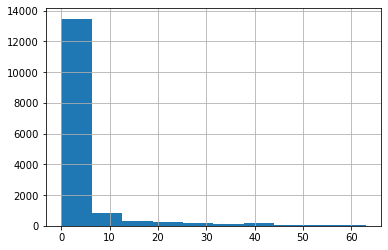

In [293]:
data['Number of Existing Stories'].hist()

In [296]:
df_check = data.replace('',np.nan)
df_check.isna().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Number Suffix                          0
Street Name                                   0
Street Suffix                               194
Unit                                          0
Description                                  25
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                                 635
Completed Date                             6235
First Construction Document Date            639
Structural Notification                       0
Number of Existing Stories                    0
Number of Proposed Stories              

In [302]:
data['Description']

0        ground fl facade: to erect illuminated, electr...
1                  remove (e) awning and associated signs.
2                          installation of separating wall
3                 repair dryrot & stucco at front of bldg.
4        demolish retail/office/commercial 3-story buil...
                               ...                        
15359    install finishing plumbing, finish electrical,...
15360    revision to 201208288466 to add a toilet in th...
15361    revision to 201208288466 to add a toilet in th...
15362    interior renovation unit #2334, new kitchen fi...
15363                                  street space permit
Name: Description, Length: 15364, dtype: object

<AxesSubplot:>

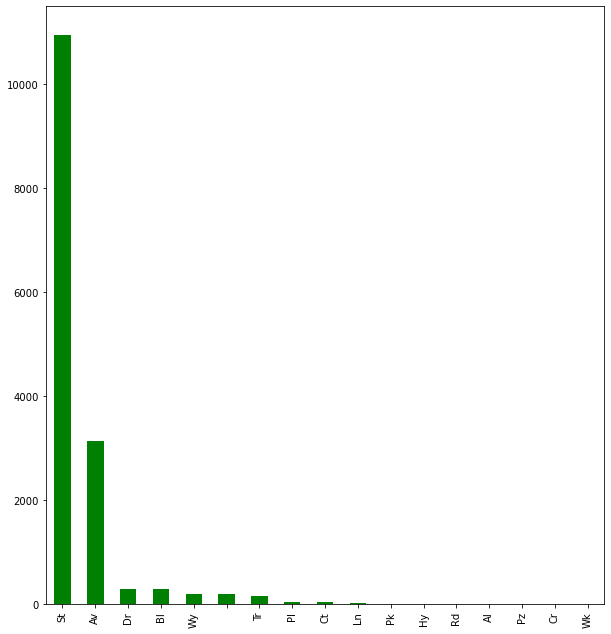

In [301]:
data['Street Suffix'].value_counts().plot(kind='bar',color='g',figsize=(10,11))

We will replace null values with the mode of the data MCAR

In [305]:
data['Street Suffix'].mode()

0    St
Name: Street Suffix, dtype: object

In [320]:
data['Street Suffix'].replace('','St',inplace=True)

In [312]:
data['Street Suffix'].mode()

0    St
Name: Street Suffix, dtype: object

In [322]:
data['Street Suffix'].isna().sum()

0

In [321]:
df_check = data.replace('',np.nan)
df_check.isna().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Number Suffix                          0
Street Name                                   0
Street Suffix                                 0
Unit                                          0
Description                                  25
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                                 635
Completed Date                             6235
First Construction Document Date            639
Structural Notification                       0
Number of Existing Stories                    0
Number of Proposed Stories              

In [352]:
data_issued.loc[0:14750,'Issued Date':]

,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,2013-01-02,08/09/2013,01/02/2013,,2,2,,12/28/2013,26530,26530,...,5,wood frame (5),5,wood frame (5),,8,Castro/Upper Market,94114,"(37.76331368403074, -122.43177542013316)",1.292200e+12
1,2013-01-02,02/11/2013,01/02/2013,,2,2,,12/28/2013,15000,15000,...,5,wood frame (5),5,wood frame (5),,11,Oceanview/Merced/Ingleside,94132,"(37.71986921116656, -122.47026232477846)",1.292170e+12
2,2013-01-02,03/15/2013,01/02/2013,,2,2,,12/28/2013,7500,9000,...,5,wood frame (5),5,wood frame (5),,1,Inner Richmond,94118,"(37.7836823771584, -122.46050289351274)",1.292210e+11
3,2013-01-02,,01/02/2013,,2,2,,12/28/2013,40000,40000,...,5,wood frame (5),5,wood frame (5),,7,West of Twin Peaks,94112,"(37.72480987268102, -122.45931548632585)",1.292170e+12
4,2013-01-02,,01/02/2013,,,,,,,1,...,,,,,,8,Mission,94110,"(37.75726982320286, -122.42428717356195)",1.292170e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14746,NaT,,,,2,2,,,10000,0,...,5,wood frame (5),5,wood frame (5),,9,Bernal Heights,94110,"(37.73793272610526, -122.41446118168759)",1.427950e+12
14747,NaT,,,,4,4,,,40000,40000,...,5,wood frame (5),5,wood frame (5),,5,Hayes Valley,94102,"(37.77261380729689, -122.4242148174291)",1.437290e+11
14748,NaT,,,,2,2,,,3000,0,...,5,wood frame (5),5,wood frame (5),,7,Inner Sunset,94131,"(37.75393571746845, -122.45759042994501)",1.448590e+12
14749,NaT,,,,2,,,,4000,,...,2,constr type 2,,,,3,Financial District/South Beach,94102,"(37.78584544618807, -122.40652160493985)",1.457590e+11


In [353]:
data['Issued Date'] = data_issued['Issued Date'].ffill()

In [374]:
data_completed = data.sort_values(by='Completed Date').reset_index(drop=True)
data_constru =data.sort_values(by='First Construction Document Date').reset_index(drop=True)

In [376]:
data_completed.loc[data_completed['First Construction Document Date'].isna(),'Issued Date':]

,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
9129,2013-01-02,NaT,NaT,N,6.0,,,2016-11-03,4000,4000,...,3,constr type 3,,,,3,Tenderloin,94102,"(37.785719256680785, -122.40852313194863)",1.380610e+12
9130,2013-01-02,NaT,NaT,N,7.0,,,2017-12-03,1,500,...,3,constr type 3,,,,3,Tenderloin,94102,"(37.78733980600732, -122.41063199757738)",1.420160e+12
9131,2013-01-02,NaT,NaT,N,6.0,6,,NaT,20000,,...,1,constr type 1,1,constr type 1,,3,Russian Hill,94109,"(37.7946573324287, -122.42232562979227)",1.424860e+12
9132,2013-01-02,NaT,NaT,N,2.0,2,,2018-07-13,2000,2000,...,5,wood frame (5),5,wood frame (5),,3,Nob Hill,94109,"(37.79595867909168, -122.41557405519474)",1.443570e+12
9133,2013-01-02,NaT,NaT,N,3.0,,,2018-12-01,100000,100000,...,3,constr type 3,,,,6,Tenderloin,94102,"(37.78315261897309, -122.40950883997789)",1.445480e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9763,2013-01-10,NaT,NaT,N,3.0,,,NaT,,1,...,,,,,,10,Mission,94103,"(37.76551132536117, -122.40717723579117)",1.292270e+12
9764,2013-01-10,NaT,NaT,N,18.0,18,,2016-04-01,1500000,1970000,...,1,constr type 1,1,constr type 1,,6,Financial District/South Beach,94105,"(37.79113727520808, -122.3918431520571)",1.292270e+12
9765,2013-01-10,NaT,NaT,N,3.0,,,NaT,,20,...,,,,,,6,South of Market,94103,"(37.77779688692988, -122.41137469845343)",1.292270e+12
9766,2013-01-10,NaT,NaT,N,3.0,,,NaT,,20,...,,,,,,6,South of Market,94103,"(37.77779688692988, -122.41137469845343)",1.292270e+12


In [372]:
data['Completed Date'] = pd.to_datetime(data['Completed Date'])
data['Completed Date'].dtype

dtype('<M8[ns]')

In [373]:
data['First Construction Document Date'] = pd.to_datetime(data['First Construction Document Date'])

In [377]:
data['Completed Date'] = data_completed['Completed Date'].ffill().bfill()
data['First Construction Document Date'] = data_constru['First Construction Document Date'].ffill().bfill()

In [341]:
data_issued['Issued Date'][14728]

Timestamp('2018-02-23 00:00:00')

In [344]:
start = data['Issued Date'][0]
end  = data['Issued Date'][14728]

new_date = pd.date_range(start='2013-01-02',end='2018-02-23',freq='W')

In [345]:
new_date

DatetimeIndex(['2013-01-06', '2013-01-13', '2013-01-20', '2013-01-27',
               '2013-02-03', '2013-02-10', '2013-02-17', '2013-02-24',
               '2013-03-03', '2013-03-10',
               ...
               '2017-12-17', '2017-12-24', '2017-12-31', '2018-01-07',
               '2018-01-14', '2018-01-21', '2018-01-28', '2018-02-04',
               '2018-02-11', '2018-02-18'],
              dtype='datetime64[ns]', length=268, freq='W-SUN')

In [415]:
df_check = data.replace('',np.nan)
df_check.isna().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Number Suffix                          0
Street Name                                   0
Street Suffix                                 0
Unit                                          0
Description                                  25
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                                   0
Completed Date                                0
First Construction Document Date              0
Structural Notification                       0
Number of Existing Stories                    0
Number of Proposed Stories              

In [406]:
data[['longitude','latitude']] = data['Location'].str.strip('()').str.split(',',1,expand=True)

In [417]:
df = df_check.copy()

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15364 entries, 0 to 15363
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Permit Number                           15364 non-null  object        
 1   Permit Type                             15364 non-null  int64         
 2   Permit Type Definition                  15364 non-null  object        
 3   Permit Creation Date                    15364 non-null  object        
 4   Block                                   15364 non-null  object        
 5   Lot                                     15364 non-null  object        
 6   Street Number                           15364 non-null  int64         
 7   Street Number Suffix                    15364 non-null  object        
 8   Street Name                             15364 non-null  object        
 9   Street Suffix                           15364 non-

In [422]:
df[['Record ID','latitude','Zipcode','longitude','Supervisor District']] = df[['Record ID','latitude','Zipcode','longitude','Supervisor District']].astype(float)

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15364 entries, 0 to 15363
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Permit Number                           15364 non-null  object        
 1   Permit Type                             15364 non-null  int64         
 2   Permit Type Definition                  15364 non-null  object        
 3   Permit Creation Date                    15364 non-null  object        
 4   Block                                   15364 non-null  object        
 5   Lot                                     15364 non-null  object        
 6   Street Number                           15364 non-null  int64         
 7   Street Number Suffix                    15364 non-null  object        
 8   Street Name                             15364 non-null  object        
 9   Street Suffix                           15364 non-

In [428]:
random_record = df['Record ID'].drop(df[df['Record ID'].isna()].index).sample(df['Record ID'].isna().sum(),random_state=0)
random_long = df['longitude'].drop(df[df['longitude'].isna()].index).sample(df['longitude'].isna().sum(),random_state=0)
random_lat = df['latitude'].drop(df[df['latitude'].isna()].index).sample(df['latitude'].isna().sum(),random_state=0)
random_zip = df['Zipcode'].drop(df[df['Zipcode'].isna()].index).sample(df['Zipcode'].isna().sum(),random_state=0)
random_dist = df['Supervisor District'].drop(df[df['Supervisor District'].isna()].index).sample(df['Supervisor District'].isna().sum(),random_state=0)

In [430]:
random_record.index = df[df['Record ID'].isna()].index
random_long.index = df[df['longitude'].isna()].index
random_lat.index = df[df['latitude'].isna()].index
random_zip.index = df[df['Zipcode'].isna()].index
random_dist.index = df[df['Supervisor District'].isna()].index

In [433]:
df.loc[df['Record ID'].isna(),'Record ID']=random_record
df.loc[df['longitude'].isna(),'longitude']=random_long
df.loc[df['latitude'].isna(),'latitude']=random_lat
df.loc[df['Zipcode'].isna(),'Zipcode']=random_zip
df.loc[df['Supervisor District'].isna(),'Supervisor District']=random_dist

In [434]:
df.drop(columns="Location",inplace=True)
df.isna().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Number Suffix                          0
Street Name                                   0
Street Suffix                                 0
Unit                                          0
Description                                  25
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                                   0
Completed Date                                0
First Construction Document Date              0
Structural Notification                       0
Number of Existing Stories                    0
Number of Proposed Stories              

In [442]:
df['Proposed Use'].value_counts()

1 family dwelling      3757
apartments             2805
office                 1911
2 family dwelling      1707
retail sales            457
                       ... 
dance hall                1
library                   1
storage tanks             1
day care home lt 7        1
chemical processing       1
Name: Proposed Use, Length: 69, dtype: int64

In [447]:
df['Site Permit'] = data['Site Permit']
df['Site Permit'].value_counts()

     15068
Y      296
Name: Site Permit, dtype: int64

In [448]:
df['Site Permit'].replace('','N',inplace=True)

In [445]:
#df['Site Permit'].fillna('Y',inplace=True)

In [449]:
df['Site Permit'].value_counts()

N    15068
Y      296
Name: Site Permit, dtype: int64

In [470]:
df.isna().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Number Suffix                          0
Street Name                                   0
Street Suffix                                 0
Unit                                          0
Description                                  25
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                                   0
Completed Date                                0
First Construction Document Date              0
Structural Notification                       0
Number of Existing Stories                    0
Number of Proposed Stories              

In [451]:
df['Neighborhoods - Analysis Boundaries'].value_counts()

Financial District/South Beach    1611
Mission                           1099
South of Market                    794
Sunset/Parkside                    774
West of Twin Peaks                 734
Castro/Upper Market                712
Pacific Heights                    706
Marina                             689
Noe Valley                         668
Outer Richmond                     538
Nob Hill                           468
North Beach                        440
Bernal Heights                     440
Bayview Hunters Point              434
Inner Sunset                       433
Haight Ashbury                     407
Tenderloin                         403
Russian Hill                       390
Hayes Valley                       384
Chinatown                          342
Potrero Hill                       340
Presidio Heights                   305
Inner Richmond                     295
Excelsior                          246
Lone Mountain/USF                  244
Western Addition         

In [454]:
df['Neighborhoods - Analysis Boundaries'].mode()

0    Financial District/South Beach
Name: Neighborhoods - Analysis Boundaries, dtype: object

In [464]:
df['Neighborhoods - Analysis Boundaries'].replace(np.nan,'Financial District/South Beach',inplace=True)

In [467]:
df['Revised Cost'].fillna(df['Revised Cost'].median(),inplace=True)

In [478]:
df['Existing Construction Type Description'].mode()[0]

'wood frame (5)'

In [479]:
df['Proposed Construction Type'].fillna(df['Proposed Construction Type'].mode()[0],inplace=True)
df['Existing Construction Type'].fillna(df['Existing Construction Type'].mode()[0],inplace=True)
df['Existing Construction Type Description'].fillna(df['Existing Construction Type Description'].mode()[0],inplace=True)
df['Proposed Construction Type Description'].fillna(df['Proposed Construction Type Description'].mode()[0],inplace=True)    

In [480]:
df.isna().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Number Suffix                          0
Street Name                                   0
Street Suffix                                 0
Unit                                          0
Description                                  25
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                                   0
Completed Date                                0
First Construction Document Date              0
Structural Notification                       0
Number of Existing Stories                    0
Number of Proposed Stories              

In [498]:
df['Proposed Use'].value_counts()

1 family dwelling      3757
apartments             2805
office                 1911
2 family dwelling      1707
retail sales            457
                       ... 
dance hall                1
library                   1
storage tanks             1
day care home lt 7        1
chemical processing       1
Name: Proposed Use, Length: 69, dtype: int64

In [494]:
df['Number of Proposed Stories'].fillna(0.0,inplace=True)
df['Fire Only Permit'].fillna('N',inplace=True)
df['Permit Expiration Date'] = df['Permit Expiration Date'].ffill().bfill()
df['Estimated Cost'].fillna(df['Estimated Cost'].median(),inplace=True)
df['Existing Units'].fillna(0.0,inplace=True)
df['Existing Use'].fillna('None',inplace=True)
df['Proposed Units'].fillna(0.0,inplace=True)
df['Plansets'].fillna(0.0,inplace=True)

In [499]:
df['Proposed Use'].fillna('None',inplace=True)

In [500]:
df.isna().sum()

Permit Number                              0
Permit Type                                0
Permit Type Definition                     0
Permit Creation Date                       0
Block                                      0
Lot                                        0
Street Number                              0
Street Number Suffix                       0
Street Name                                0
Street Suffix                              0
Unit                                       0
Description                               25
Current Status                             0
Current Status Date                        0
Filed Date                                 0
Issued Date                                0
Completed Date                             0
First Construction Document Date           0
Structural Notification                    0
Number of Existing Stories                 0
Number of Proposed Stories                 0
Fire Only Permit                           0
Permit Exp

In [512]:
df

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Record ID,longitude,latitude
0,201505000000.0,4,sign - erect,05/06/2015,326,23,140,None,Ellis,St,...,constr type 3,5.0,wood frame (5),N,3.0,Tenderloin,94102.0,1.380610e+12,37.785719,-122.408523
1,201604000000.0,4,sign - erect,04/19/2016,306,7,440,None,Geary,St,...,constr type 3,5.0,wood frame (5),N,3.0,Tenderloin,94102.0,1.420160e+12,37.787340,-122.410632
2,201605000000.0,3,additions alterations or repairs,05/27/2016,595,203,1647,None,Pacific,Av,...,constr type 1,1.0,constr type 1,N,3.0,Russian Hill,94109.0,1.424860e+12,37.794657,-122.422326
3,201611000000.0,8,otc alterations permit,11/07/2016,156,11,1230,None,Pacific,Av,...,wood frame (5),5.0,wood frame (5),N,3.0,Nob Hill,94109.0,1.443570e+12,37.795959,-122.415574
4,201611000000.0,6,demolitions,11/28/2016,342,1,950,None,Market,St,...,constr type 3,5.0,wood frame (5),N,6.0,Tenderloin,94102.0,1.445480e+11,37.783153,-122.409509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15359,201306000000.0,8,otc alterations permit,06/11/2013,7104,018B,162,None,Farallones,St,...,wood frame (5),5.0,wood frame (5),N,11.0,Oceanview/Merced/Ingleside,94112.0,1.307690e+12,37.714318,-122.457936
15360,201306000000.0,8,otc alterations permit,06/11/2013,3609,81,3549,None,20th,St,...,wood frame (5),5.0,wood frame (5),N,9.0,Mission,94110.0,1.307690e+12,37.758364,-122.420129
15361,201306000000.0,8,otc alterations permit,06/11/2013,3609,81,3551,None,20th,St,...,wood frame (5),5.0,wood frame (5),N,9.0,Mission,94110.0,1.307690e+12,37.758364,-122.420129
15362,201306000000.0,8,otc alterations permit,06/11/2013,4260,13,2334,None,25th,St,...,wood frame (5),5.0,wood frame (5),N,10.0,Potrero Hill,94107.0,1.307690e+12,37.752136,-122.402061


In [515]:
df.drop(labels=df[df['Description'].isna()].index,axis=0,inplace=True)

In [516]:
df.isna().sum()

Permit Number                             0
Permit Type                               0
Permit Type Definition                    0
Permit Creation Date                      0
Block                                     0
Lot                                       0
Street Number                             0
Street Number Suffix                      0
Street Name                               0
Street Suffix                             0
Unit                                      0
Description                               0
Current Status                            0
Current Status Date                       0
Filed Date                                0
Issued Date                               0
Completed Date                            0
First Construction Document Date          0
Structural Notification                   0
Number of Existing Stories                0
Number of Proposed Stories                0
Fire Only Permit                          0
Permit Expiration Date          

In [518]:
df.reset_index(drop=True,inplace=True)
df

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Record ID,longitude,latitude
0,201505000000.0,4,sign - erect,05/06/2015,326,23,140,None,Ellis,St,...,constr type 3,5.0,wood frame (5),N,3.0,Tenderloin,94102.0,1.380610e+12,37.785719,-122.408523
1,201604000000.0,4,sign - erect,04/19/2016,306,7,440,None,Geary,St,...,constr type 3,5.0,wood frame (5),N,3.0,Tenderloin,94102.0,1.420160e+12,37.787340,-122.410632
2,201605000000.0,3,additions alterations or repairs,05/27/2016,595,203,1647,None,Pacific,Av,...,constr type 1,1.0,constr type 1,N,3.0,Russian Hill,94109.0,1.424860e+12,37.794657,-122.422326
3,201611000000.0,8,otc alterations permit,11/07/2016,156,11,1230,None,Pacific,Av,...,wood frame (5),5.0,wood frame (5),N,3.0,Nob Hill,94109.0,1.443570e+12,37.795959,-122.415574
4,201611000000.0,6,demolitions,11/28/2016,342,1,950,None,Market,St,...,constr type 3,5.0,wood frame (5),N,6.0,Tenderloin,94102.0,1.445480e+11,37.783153,-122.409509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15334,201306000000.0,8,otc alterations permit,06/11/2013,7104,018B,162,None,Farallones,St,...,wood frame (5),5.0,wood frame (5),N,11.0,Oceanview/Merced/Ingleside,94112.0,1.307690e+12,37.714318,-122.457936
15335,201306000000.0,8,otc alterations permit,06/11/2013,3609,81,3549,None,20th,St,...,wood frame (5),5.0,wood frame (5),N,9.0,Mission,94110.0,1.307690e+12,37.758364,-122.420129
15336,201306000000.0,8,otc alterations permit,06/11/2013,3609,81,3551,None,20th,St,...,wood frame (5),5.0,wood frame (5),N,9.0,Mission,94110.0,1.307690e+12,37.758364,-122.420129
15337,201306000000.0,8,otc alterations permit,06/11/2013,4260,13,2334,None,25th,St,...,wood frame (5),5.0,wood frame (5),N,10.0,Potrero Hill,94107.0,1.307690e+12,37.752136,-122.402061


In [519]:
df.to_csv("cleaned_data.csv",index=False)